# 🚖 Taxi Fare Prediction - Complete Data Preprocessing Pipeline

This notebook contains the complete, standalone data preprocessing pipeline extracted from the professional taxi fare prediction project (Task_5_2). It includes all data cleaning, feature engineering, and transformation steps used in the production system.

## 📋 Pipeline Overview
1. **Data Loading & Initial Assessment**
2. **Data Quality Assessment & Cleaning**
3. **Logical Error Filtering**
4. **Temporal Feature Engineering**
5. **Distance & Geographic Feature Engineering**
6. **Weather & Traffic Feature Engineering**
7. **Target Variable Treatment**
8. **Feature Scaling & Normalization**
9. **Train/Test Split**
10. **Final Dataset Preparation**
11. **Validation & Quality Checks**

## 🎯 Key Features
- **Comprehensive data cleaning** with logical error detection
- **Advanced feature engineering** including temporal, geographic, and external conditions
- **Proper scaling techniques** for different feature types
- **Temporal train/test split** to prevent data leakage
- **Built-in validation** with baseline model testing
- **Production-ready** preprocessing pipeline

## 1. Setup & Library Imports

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from math import radians, cos, sin, asin, sqrt
import json
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")
print(f"📅 Preprocessing started at: {datetime.now()}")

✅ Libraries imported successfully!
📅 Preprocessing started at: 2025-08-01 21:46:56.837679


## 2. Data Loading & Initial Assessment

In [2]:
# Load the dataset
print("📂 Loading dataset...")
df = pd.read_csv('dataset.csv')  # Adjust path as needed

print(f"✅ Dataset loaded successfully!")
print(f"📊 Shape: {df.shape}")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"📋 Columns: {list(df.columns)}")

# Display first few rows
print("\n🔍 First 5 rows:")
display(df.head())

# Basic info
print("\n📈 Dataset Info:")
df.info()

📂 Loading dataset...
✅ Dataset loaded successfully!
📊 Shape: (500000, 26)
💾 Memory usage: 337.07 MB
📋 Columns: ['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather', 'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month', 'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance', 'bearing']

🔍 First 5 rows:


,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,0.710721,-1.288779,0.710563,1,17,15,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,0.710546,-1.291182,0.711780,1,16,5,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,0.711418,-1.291391,0.711231,2,0,18,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,0.710927,-1.291396,0.711363,1,4,21,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,0.711536,-1.290787,0.711811,1,7,9,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703



📈 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null

## 3. Data Quality Assessment

=== 🔍 INITIAL DATA QUALITY ASSESSMENT ===
Dataset shape: (500000, 26)

Data types:
float64    12
object      8
int64       6
Name: count, dtype: int64

⚠️ Missing values:
dropoff_longitude    5
dropoff_latitude     5
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

🎯 Target variable (fare_amount) analysis:
count    500000.000000
mean         11.358361
std           9.916617
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         500.000000
Name: fare_amount, dtype: float64
Unique values: 1,688
Negative fares: 21
Zero fares: 14
High fares (>$100): 214


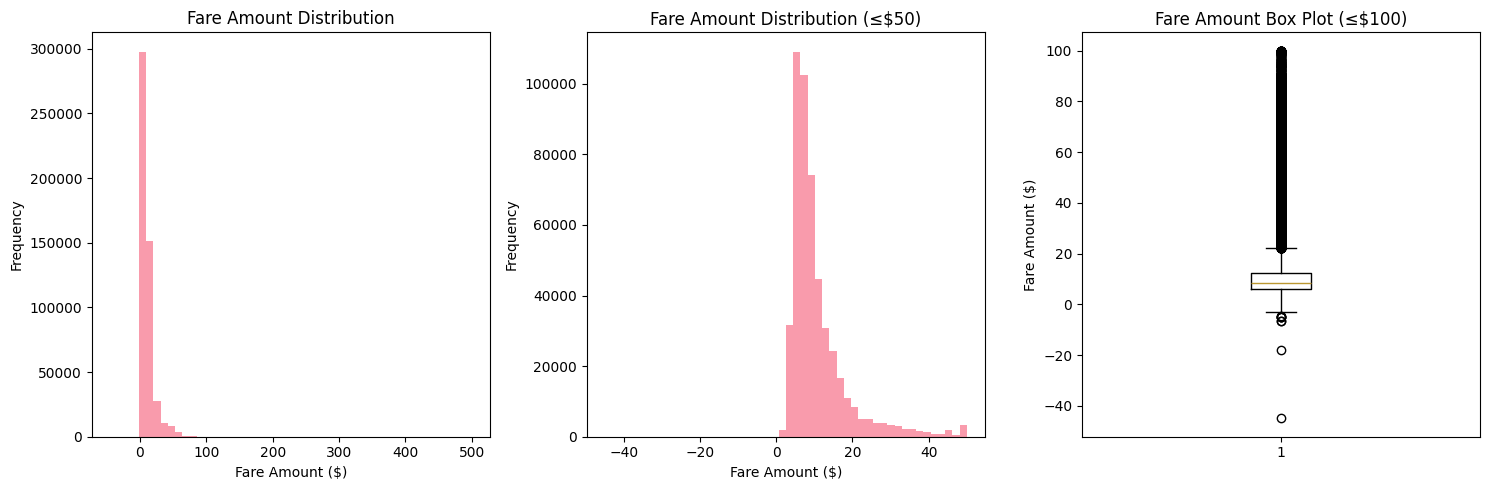

In [3]:
print("=== 🔍 INITIAL DATA QUALITY ASSESSMENT ===")
print(f"Dataset shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes.value_counts())

# Missing values analysis
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print(f"\n⚠️ Missing values:")
    print(missing_values[missing_values > 0])
else:
    print(f"\n✅ Missing values: None found")

# Target variable analysis
print(f"\n🎯 Target variable (fare_amount) analysis:")
print(df['fare_amount'].describe())
print(f"Unique values: {df['fare_amount'].nunique():,}")
print(f"Negative fares: {(df['fare_amount'] < 0).sum():,}")
print(f"Zero fares: {(df['fare_amount'] == 0).sum():,}")
print(f"High fares (>$100): {(df['fare_amount'] > 100).sum():,}")

# Visualize target distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['fare_amount'], bins=50, alpha=0.7)
plt.title('Fare Amount Distribution')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['fare_amount'][df['fare_amount'] <= 50], bins=50, alpha=0.7)
plt.title('Fare Amount Distribution (≤$50)')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.boxplot(df['fare_amount'][df['fare_amount'] <= 100])
plt.title('Fare Amount Box Plot (≤$100)')
plt.ylabel('Fare Amount ($)')

plt.tight_layout()
plt.show()

## 4. Data Cleaning & Logical Error Filtering

In [4]:
# Create a copy for cleaning
df_clean = df.copy()
print(f"🧹 Starting data cleaning with {len(df_clean):,} trips")

print("\n=== 🚫 LOGICAL ERROR FILTERING ===")
initial_count = len(df_clean)

# Step 1: Remove negative fares
negative_fares = (df_clean['fare_amount'] < 0).sum()
print(f"\n1. Negative fares found: {negative_fares:,}")
if negative_fares > 0:
    df_clean = df_clean[df_clean['fare_amount'] >= 0].copy()
    print(f"   ✅ Removed {negative_fares:,} trips with negative fares")
    print(f"   📊 Remaining: {len(df_clean):,} trips")

# Step 2: Check coordinate ranges
print(f"\n2. Coordinate ranges check:")
print(f"   Pickup latitude: {df_clean['pickup_latitude'].min():.3f} to {df_clean['pickup_latitude'].max():.3f}")
print(f"   Pickup longitude: {df_clean['pickup_longitude'].min():.3f} to {df_clean['pickup_longitude'].max():.3f}")
print(f"   Dropoff latitude: {df_clean['dropoff_latitude'].min():.3f} to {df_clean['dropoff_latitude'].max():.3f}")
print(f"   Dropoff longitude: {df_clean['dropoff_longitude'].min():.3f} to {df_clean['dropoff_longitude'].max():.3f}")

# Step 3: Filter high fare + low distance (if distance column exists)
if 'distance' in df_clean.columns:
    suspicious_expensive = df_clean[
        (df_clean['fare_amount'] > 50) & 
        (df_clean['distance'] < 1) &
        (df_clean['fare_amount'] / (df_clean['distance'] + 0.001) > 100)
    ]
    print(f"\n3. High fare + Low distance trips: {len(suspicious_expensive):,}")
    if len(suspicious_expensive) > 0:
        df_clean = df_clean.drop(suspicious_expensive.index)
        print(f"   ✅ Removed trips with >$50 fare and <1 mile distance (>$100/mile)")
        print(f"   📊 Remaining: {len(df_clean):,} trips")

# Step 4: Filter low fare + long distance
if 'distance' in df_clean.columns:
    suspicious_cheap = df_clean[
        (df_clean['fare_amount'] < 5) & 
        (df_clean['distance'] > 10) &
        (df_clean['fare_amount'] / (df_clean['distance'] + 0.001) < 0.5)
    ]
    print(f"\n4. Low fare + Long distance trips: {len(suspicious_cheap):,}")
    if len(suspicious_cheap) > 0:
        df_clean = df_clean.drop(suspicious_cheap.index)
        print(f"   ✅ Removed trips with <$5 fare and >10 miles distance (<$0.50/mile)")
        print(f"   📊 Remaining: {len(df_clean):,} trips")

# Step 5: Filter invalid passenger counts
invalid_passengers = df_clean[
    (df_clean['passenger_count'] <= 0) | 
    (df_clean['passenger_count'] > 8)
]
print(f"\n5. Invalid passenger count trips: {len(invalid_passengers):,}")
if len(invalid_passengers) > 0:
    df_clean = df_clean.drop(invalid_passengers.index)
    print(f"   ✅ Removed trips with ≤0 or >8 passengers")
    print(f"   📊 Remaining: {len(df_clean):,} trips")

# Step 6: Filter zero distance with positive fare
if 'distance' in df_clean.columns:
    zero_distance_paid = df_clean[
        (df_clean['distance'] <= 0) &
        (df_clean['fare_amount'] > 2.50)
    ]
    print(f"\n6. Zero distance + Paid fare trips: {len(zero_distance_paid):,}")
    if len(zero_distance_paid) > 0:
        df_clean = df_clean.drop(zero_distance_paid.index)
        print(f"   ✅ Removed trips with zero distance but >$2.50 fare")
        print(f"   📊 Remaining: {len(df_clean):,} trips")

# Summary of filtering
total_removed = initial_count - len(df_clean)
print(f"\n=== 📊 FILTERING SUMMARY ===")
print(f"Initial trips: {initial_count:,}")
print(f"Final trips: {len(df_clean):,}")
print(f"Total removed: {total_removed:,} ({total_removed/initial_count*100:.2f}%)")

🧹 Starting data cleaning with 500,000 trips

=== 🚫 LOGICAL ERROR FILTERING ===

1. Negative fares found: 21
   ✅ Removed 21 trips with negative fares
   📊 Remaining: 499,979 trips

2. Coordinate ranges check:
   Pickup latitude: -54.389 to 29.725
   Pickup longitude: -52.120 to 37.361
   Dropoff latitude: -44.676 to 7.062
   Dropoff longitude: -59.050 to 0.713

3. High fare + Low distance trips: 669
   ✅ Removed trips with >$50 fare and <1 mile distance (>$100/mile)
   📊 Remaining: 499,310 trips

4. Low fare + Long distance trips: 310
   ✅ Removed trips with <$5 fare and >10 miles distance (<$0.50/mile)
   📊 Remaining: 499,000 trips

5. Invalid passenger count trips: 1,792
   ✅ Removed trips with ≤0 or >8 passengers
   📊 Remaining: 497,208 trips

6. Zero distance + Paid fare trips: 13,383
   ✅ Removed trips with zero distance but >$2.50 fare
   📊 Remaining: 483,825 trips

=== 📊 FILTERING SUMMARY ===
Initial trips: 500,000
Final trips: 483,825
Total removed: 16,175 (3.23%)


## 5. Temporal Feature Engineering

=== ⏰ TEMPORAL FEATURE ENGINEERING ===
✅ Converted pickup_datetime to datetime format
✅ Extracted basic temporal features: hour, day_of_week, month, day, year
✅ Created time categories: is_weekend, is_morning_rush, is_evening_rush, is_rush_hour

📊 Temporal features summary:
Date range: 2009-01-01 00:31:32 to 2015-06-30 23:38:21
Weekend trips: 136,937 (28.3%)
Rush hour trips: 145,695 (30.1%)


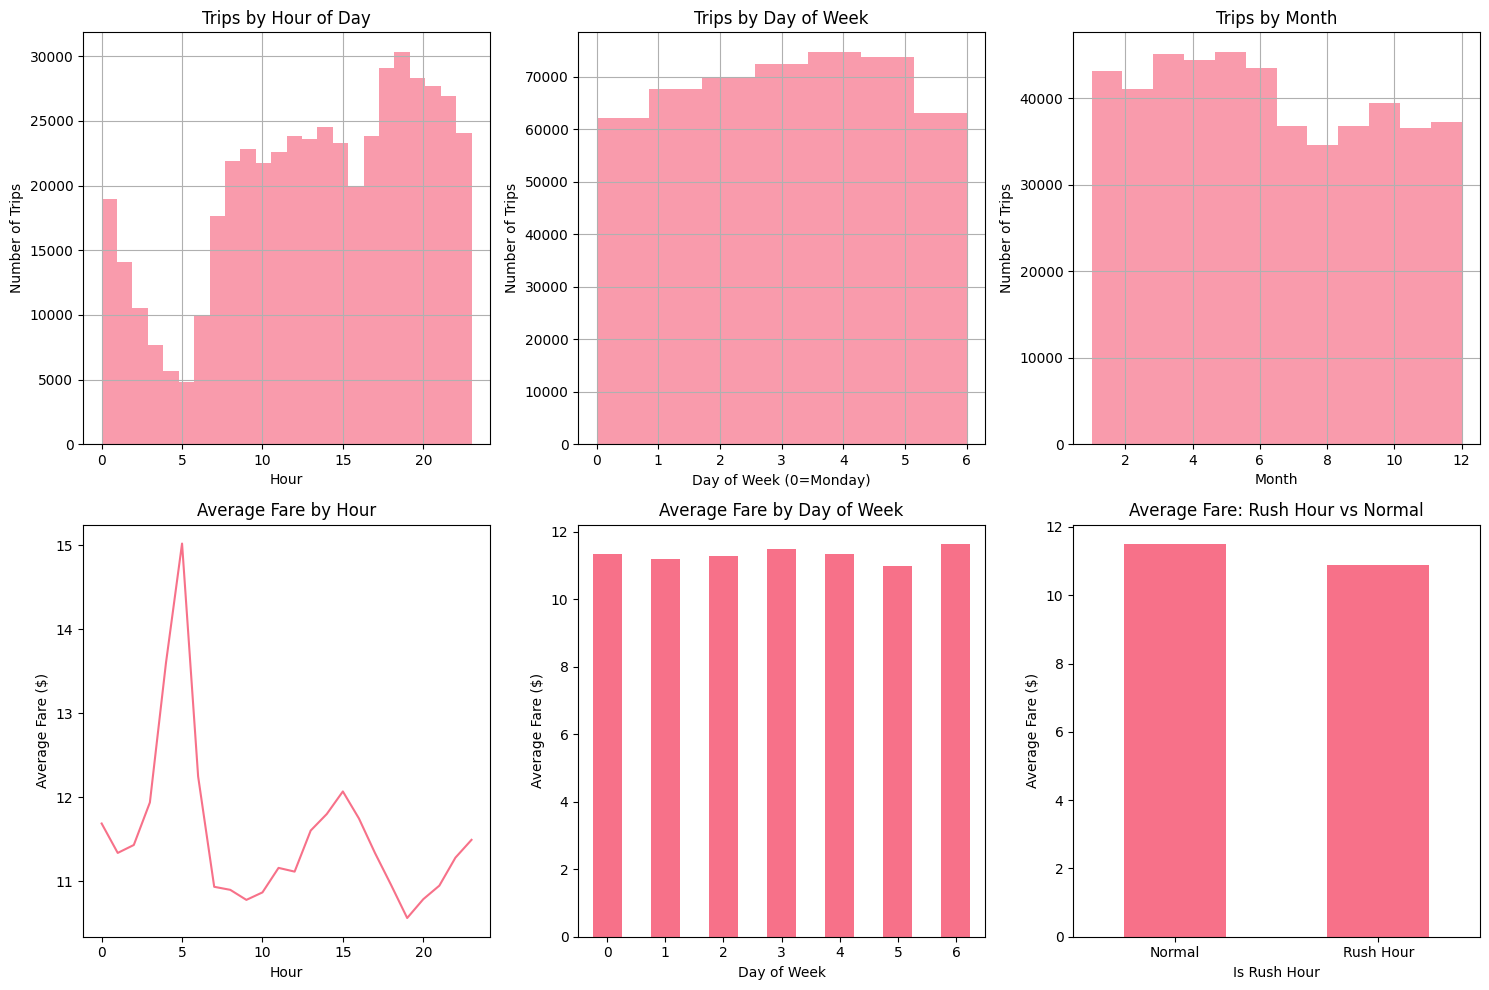

In [5]:
print("=== ⏰ TEMPORAL FEATURE ENGINEERING ===")

# Convert pickup_datetime to datetime
df_clean['pickup_datetime'] = pd.to_datetime(df_clean['pickup_datetime'])
print(f"✅ Converted pickup_datetime to datetime format")

# Extract basic temporal features
df_clean['hour'] = df_clean['pickup_datetime'].dt.hour
df_clean['day_of_week'] = df_clean['pickup_datetime'].dt.dayofweek  # 0=Monday
df_clean['month'] = df_clean['pickup_datetime'].dt.month
df_clean['day'] = df_clean['pickup_datetime'].dt.day
df_clean['year'] = df_clean['pickup_datetime'].dt.year

print(f"✅ Extracted basic temporal features: hour, day_of_week, month, day, year")

# Create meaningful time categories
df_clean['is_weekend'] = (df_clean['day_of_week'] >= 5).astype(int)
df_clean['is_morning_rush'] = ((df_clean['hour'] >= 7) & (df_clean['hour'] <= 9)).astype(int)
df_clean['is_evening_rush'] = ((df_clean['hour'] >= 17) & (df_clean['hour'] <= 19)).astype(int)
df_clean['is_rush_hour'] = (df_clean['is_morning_rush'] | df_clean['is_evening_rush']).astype(int)

print(f"✅ Created time categories: is_weekend, is_morning_rush, is_evening_rush, is_rush_hour")

# Display temporal feature summary
print(f"\n📊 Temporal features summary:")
print(f"Date range: {df_clean['pickup_datetime'].min()} to {df_clean['pickup_datetime'].max()}")
print(f"Weekend trips: {df_clean['is_weekend'].sum():,} ({df_clean['is_weekend'].mean()*100:.1f}%)")
print(f"Rush hour trips: {df_clean['is_rush_hour'].sum():,} ({df_clean['is_rush_hour'].mean()*100:.1f}%)")

# Visualize temporal patterns
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
df_clean['hour'].hist(bins=24, alpha=0.7)
plt.title('Trips by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')

plt.subplot(2, 3, 2)
df_clean['day_of_week'].hist(bins=7, alpha=0.7)
plt.title('Trips by Day of Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Number of Trips')

plt.subplot(2, 3, 3)
df_clean['month'].hist(bins=12, alpha=0.7)
plt.title('Trips by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')

plt.subplot(2, 3, 4)
df_clean.groupby('hour')['fare_amount'].mean().plot(kind='line')
plt.title('Average Fare by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Fare ($)')

plt.subplot(2, 3, 5)
df_clean.groupby('day_of_week')['fare_amount'].mean().plot(kind='bar')
plt.title('Average Fare by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Fare ($)')
plt.xticks(rotation=0)

plt.subplot(2, 3, 6)
rush_vs_normal = df_clean.groupby('is_rush_hour')['fare_amount'].mean()
rush_vs_normal.plot(kind='bar')
plt.title('Average Fare: Rush Hour vs Normal')
plt.xlabel('Is Rush Hour')
plt.ylabel('Average Fare ($)')
plt.xticks([0, 1], ['Normal', 'Rush Hour'], rotation=0)

plt.tight_layout()
plt.show()

## 6. Distance & Geographic Feature Engineering

In [6]:
print("=== 🗺️ DISTANCE & GEOGRAPHIC FEATURE ENGINEERING ===")

# Function to calculate Haversine distance
def haversine_distance(lat1, lon1, lat2, lon2):
    """Calculate the great circle distance between two points on earth (in miles)"""
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 3956  # Radius of earth in miles
    return c * r

# Use existing distance column or calculate it
if 'distance' in df_clean.columns:
    df_clean['trip_distance'] = df_clean['distance']
    print(f"✅ Using existing distance column")
else:
    # Calculate distance using Haversine formula
    print(f"🔄 Calculating trip distance using Haversine formula...")
    df_clean['trip_distance'] = df_clean.apply(
        lambda row: haversine_distance(
            row['pickup_latitude'], row['pickup_longitude'],
            row['dropoff_latitude'], row['dropoff_longitude']
        ), axis=1
    )
    print(f"✅ Calculated trip_distance using Haversine formula")

# Calculate fare per mile
df_clean['fare_per_mile'] = df_clean['fare_amount'] / (df_clean['trip_distance'] + 0.001)
print(f"✅ Calculated fare_per_mile")

# Distance statistics
print(f"\n📊 Distance features summary:")
print(f"Trip distance - Mean: {df_clean['trip_distance'].mean():.2f} miles")
print(f"Trip distance - Median: {df_clean['trip_distance'].median():.2f} miles")
print(f"Trip distance - Std: {df_clean['trip_distance'].std():.2f} miles")
print(f"Fare per mile - Mean: ${df_clean['fare_per_mile'].mean():.2f}")
print(f"Fare per mile - Median: ${df_clean['fare_per_mile'].median():.2f}")

# Airport proximity features (NYC airports)
print(f"\n✈️ Creating airport proximity features...")
airports = {
    'jfk': (40.6413, -73.7781),  # JFK Airport
    'lga': (40.7769, -73.8740),  # LaGuardia Airport
    'ewr': (40.6895, -74.1745)   # Newark Airport
}

# Calculate distances to airports
for airport_code, (airport_lat, airport_lon) in airports.items():
    # Distance from pickup to airport
    df_clean[f'{airport_code}_pickup_dist'] = df_clean.apply(
        lambda row: haversine_distance(
            row['pickup_latitude'], row['pickup_longitude'],
            airport_lat, airport_lon
        ), axis=1
    )
    
    # Distance from dropoff to airport
    df_clean[f'{airport_code}_dropoff_dist'] = df_clean.apply(
        lambda row: haversine_distance(
            row['dropoff_latitude'], row['dropoff_longitude'],
            airport_lat, airport_lon
        ), axis=1
    )

# Create consolidated airport features
airport_pickup_cols = [f'{code}_pickup_dist' for code in airports.keys()]
airport_dropoff_cols = [f'{code}_dropoff_dist' for code in airports.keys()]

df_clean['min_airport_pickup_dist'] = df_clean[airport_pickup_cols].min(axis=1)
df_clean['min_airport_dropoff_dist'] = df_clean[airport_dropoff_cols].min(axis=1)
df_clean['min_airport_dist'] = df_clean[['min_airport_pickup_dist', 'min_airport_dropoff_dist']].min(axis=1)

# Airport trip indicator (within 2 miles of any airport)
df_clean['is_airport_trip'] = (df_clean['min_airport_dist'] < 2).astype(int)

print(f"✅ Created airport proximity features")
print(f"Airport trips (within 2 miles): {df_clean['is_airport_trip'].sum():,} ({df_clean['is_airport_trip'].mean()*100:.1f}%)")

# Manhattan proximity (approximate bounds)
print(f"\n🏙️ Creating Manhattan proximity features...")
manhattan_bounds = (40.7, 40.8, -74.0, -73.9)  # lat_min, lat_max, lon_min, lon_max

def in_manhattan(lat, lon):
    return (manhattan_bounds[0] <= lat <= manhattan_bounds[1] and
           manhattan_bounds[2] <= lon <= manhattan_bounds[3])

df_clean['pickup_in_manhattan'] = df_clean.apply(
    lambda row: in_manhattan(row['pickup_latitude'], row['pickup_longitude']), axis=1
).astype(int)

df_clean['dropoff_in_manhattan'] = df_clean.apply(
    lambda row: in_manhattan(row['dropoff_latitude'], row['dropoff_longitude']), axis=1
).astype(int)

df_clean['is_manhattan'] = (
    df_clean['pickup_in_manhattan'] | df_clean['dropoff_in_manhattan']
).astype(int)

print(f"✅ Created Manhattan proximity features")
print(f"Manhattan trips: {df_clean['is_manhattan'].sum():,} ({df_clean['is_manhattan'].mean()*100:.1f}%)")

=== 🗺️ DISTANCE & GEOGRAPHIC FEATURE ENGINEERING ===
✅ Using existing distance column
✅ Calculated fare_per_mile

📊 Distance features summary:
Trip distance - Mean: 16.59 miles
Trip distance - Median: 2.18 miles
Trip distance - Std: 331.29 miles
Fare per mile - Mean: $20.18
Fare per mile - Median: $3.81

✈️ Creating airport proximity features...
✅ Created airport proximity features
Airport trips (within 2 miles): 0 (0.0%)

🏙️ Creating Manhattan proximity features...
✅ Created Manhattan proximity features
Manhattan trips: 0 (0.0%)


## 7. Weather & Traffic Feature Engineering

=== 🌤️ WEATHER & TRAFFIC FEATURE ENGINEERING ===

☀️ Weather condition distribution:
Weather
sunny     97193
rainy     96803
stormy    96772
cloudy    96712
windy     96345
Name: count, dtype: int64
✅ Created weather dummy variables: ['weather_cloudy', 'weather_rainy', 'weather_stormy', 'weather_sunny', 'weather_windy']
✅ Created weather_severity score (1=sunny to 4=stormy)

🚦 Traffic condition distribution:
Traffic Condition
Congested Traffic    161468
Flow Traffic         161198
Dense Traffic        161159
Name: count, dtype: int64
✅ Created traffic dummy variables: ['traffic_Congested Traffic', 'traffic_Dense Traffic', 'traffic_Flow Traffic']
✅ Created traffic_severity score (1=flow to 2=congested)


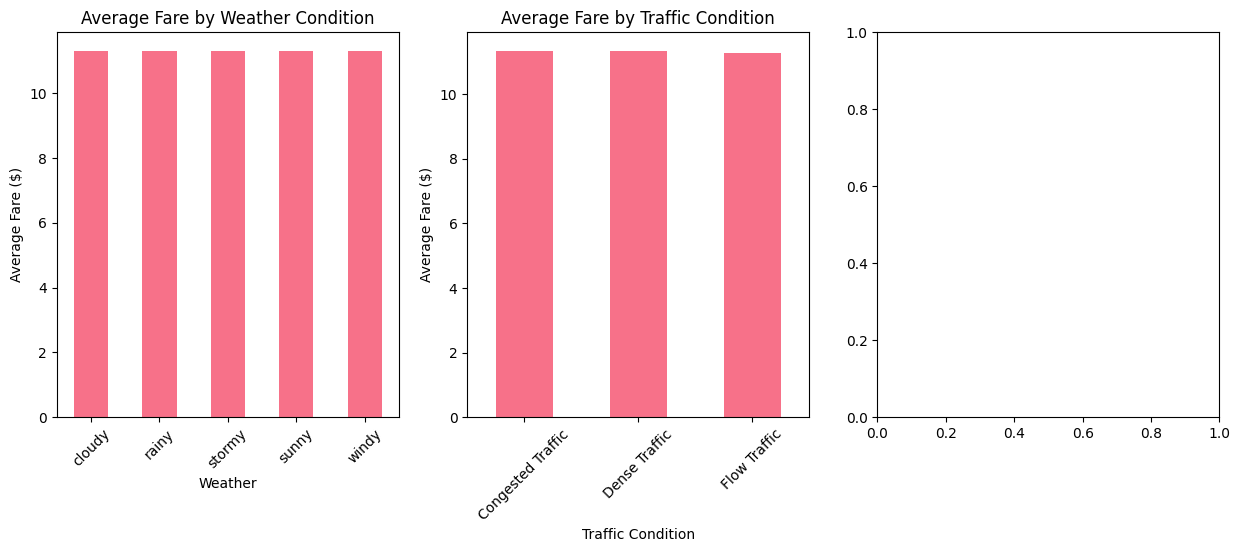

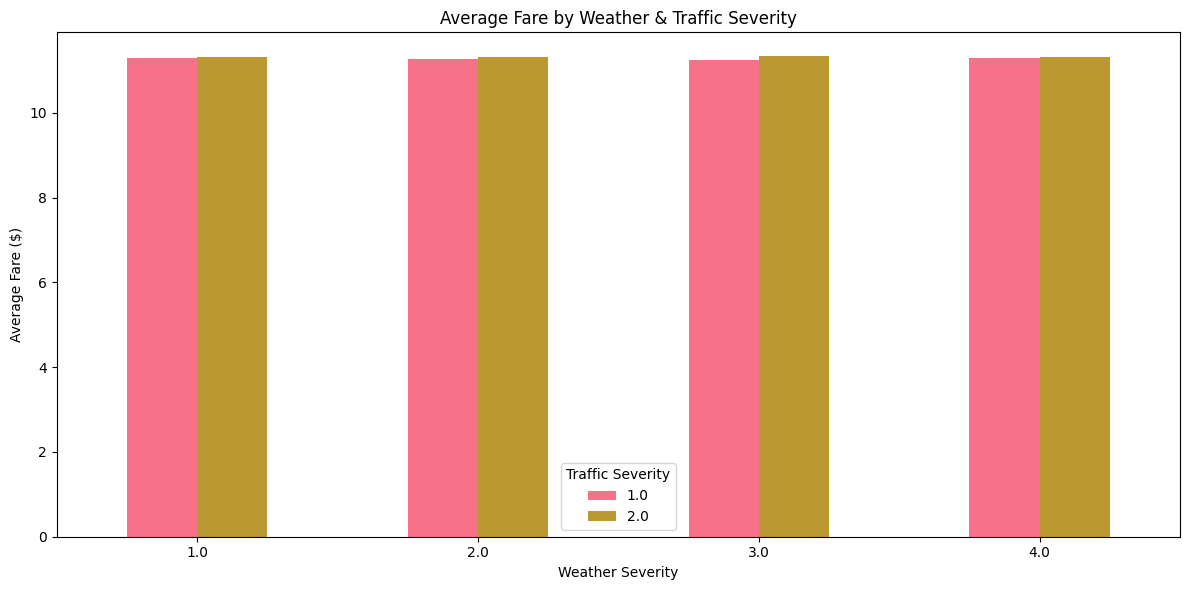

In [7]:
print("=== 🌤️ WEATHER & TRAFFIC FEATURE ENGINEERING ===")

# Weather feature engineering
if 'Weather' in df_clean.columns:
    print(f"\n☀️ Weather condition distribution:")
    print(df_clean['Weather'].value_counts())
    
    # One-hot encode weather conditions
    weather_dummies = pd.get_dummies(df_clean['Weather'], prefix='weather')
    df_clean = pd.concat([df_clean, weather_dummies], axis=1)
    print(f"✅ Created weather dummy variables: {list(weather_dummies.columns)}")
    
    # Create weather severity score
    weather_severity_map = {'sunny': 1, 'cloudy': 2, 'windy': 3, 'stormy': 4}
    df_clean['weather_clean'] = df_clean['Weather'].str.lower().str.strip()
    df_clean['weather_severity'] = df_clean['weather_clean'].map(weather_severity_map)
    
    # Fill missing weather severity with median
    if df_clean['weather_severity'].isnull().any():
        median_severity = df_clean['weather_severity'].median()
        df_clean['weather_severity'].fillna(median_severity, inplace=True)
    
    print(f"✅ Created weather_severity score (1=sunny to 4=stormy)")
else:
    print(f"⚠️ Weather column not found - creating default weather features")
    df_clean['weather_severity'] = 2  # Default to cloudy (moderate conditions)

# Traffic feature engineering
if 'Traffic Condition' in df_clean.columns:
    print(f"\n🚦 Traffic condition distribution:")
    print(df_clean['Traffic Condition'].value_counts())
    
    # One-hot encode traffic conditions
    traffic_dummies = pd.get_dummies(df_clean['Traffic Condition'], prefix='traffic')
    df_clean = pd.concat([df_clean, traffic_dummies], axis=1)
    print(f"✅ Created traffic dummy variables: {list(traffic_dummies.columns)}")
    
    # Create traffic severity score
    traffic_severity_map = {'flow traffic': 1, 'congested traffic': 2}
    df_clean['traffic_clean'] = df_clean['Traffic Condition'].str.lower().str.strip()
    df_clean['traffic_severity'] = df_clean['traffic_clean'].map(traffic_severity_map)
    
    # Fill missing traffic severity with median
    if df_clean['traffic_severity'].isnull().any():
        median_severity = df_clean['traffic_severity'].median()
        df_clean['traffic_severity'].fillna(median_severity, inplace=True)
    
    print(f"✅ Created traffic_severity score (1=flow to 2=congested)")
else:
    print(f"⚠️ Traffic Condition column not found - creating default traffic features")
    df_clean['traffic_severity'] = 1  # Default to flow traffic

# Visualize weather and traffic impact on fares
plt.figure(figsize=(15, 5))

if 'Weather' in df_clean.columns:
    plt.subplot(1, 3, 1)
    df_clean.groupby('Weather')['fare_amount'].mean().plot(kind='bar')
    plt.title('Average Fare by Weather Condition')
    plt.xlabel('Weather')
    plt.ylabel('Average Fare ($)')
    plt.xticks(rotation=45)

if 'Traffic Condition' in df_clean.columns:
    plt.subplot(1, 3, 2)
    df_clean.groupby('Traffic Condition')['fare_amount'].mean().plot(kind='bar')
    plt.title('Average Fare by Traffic Condition')
    plt.xlabel('Traffic Condition')
    plt.ylabel('Average Fare ($)')
    plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
severity_impact = df_clean.groupby(['weather_severity', 'traffic_severity'])['fare_amount'].mean().unstack()
severity_impact.plot(kind='bar')
plt.title('Average Fare by Weather & Traffic Severity')
plt.xlabel('Weather Severity')
plt.ylabel('Average Fare ($)')
plt.legend(title='Traffic Severity')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## 8. Target Variable Treatment & Feature Scaling

=== 🎯 TARGET VARIABLE TREATMENT ===
Fare amount statistics after cleaning:
count    483825.000000
mean         11.310465
std           9.515737
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         495.000000
Name: fare_amount, dtype: float64
✅ Created log-transformed fare

📊 Fare category distribution:
budget    : 294,840 trips ( 60.9%)
standard  : 138,042 trips ( 28.5%)
premium   : 45,122 trips (  9.3%)
high_end  :  5,693 trips (  1.2%)
luxury    :    128 trips (  0.0%)

=== ⚖️ FEATURE SCALING ===
✅ Standard scaled: trip_distance
   Mean: 16.590 -> -0.000
   Std:  331.287 -> 1.000
✅ Standard scaled: fare_per_mile
   Mean: 20.182 -> -0.000
   Std:  491.810 -> 1.000
✅ Standard scaled: min_airport_dist
   Mean: 5270.021 -> -0.000
   Std:  5.642 -> 1.000
✅ Min-max scaled: pickup_latitude
   Range: [-54.389, 29.725] -> [0.000, 1.000]
✅ Min-max scaled: pickup_longitude
   Range: [-12.915, 37.361] -> [0.000, 1.000]
✅ Min-max scaled: dropoff_

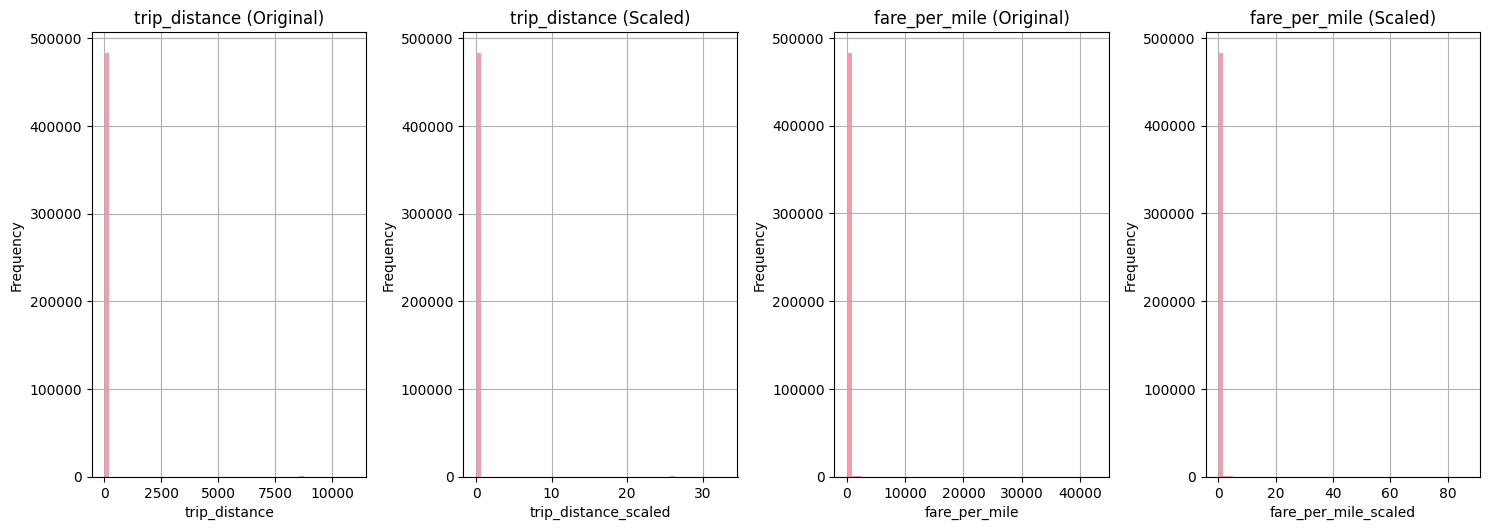

In [8]:
print("=== 🎯 TARGET VARIABLE TREATMENT ===")

print(f"Fare amount statistics after cleaning:")
print(df_clean['fare_amount'].describe())

# Log transformation for target variable
df_clean['log_fare'] = np.log1p(df_clean['fare_amount'])
print(f"✅ Created log-transformed fare")

# Create fare categories for analysis
def categorize_fare(fare):
    if fare < 10: return 'budget'
    elif fare < 20: return 'standard'  
    elif fare < 50: return 'premium'
    elif fare < 100: return 'high_end'
    else: return 'luxury'

df_clean['fare_category'] = df_clean['fare_amount'].apply(categorize_fare)

print(f"\n📊 Fare category distribution:")
fare_cat_dist = df_clean['fare_category'].value_counts()
for category, count in fare_cat_dist.items():
    print(f"{category:10}: {count:6,} trips ({count/len(df_clean)*100:5.1f}%)")

print(f"\n=== ⚖️ FEATURE SCALING ===")

# Features that need standard scaling (zero mean, unit variance)
standard_scale_features = ['trip_distance', 'fare_per_mile', 'min_airport_dist']

# Features that need min-max scaling (0-1 range)
minmax_scale_features = ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']

# Initialize scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Apply standard scaling
for feature in standard_scale_features:
    if feature in df_clean.columns:
        df_clean[f'{feature}_scaled'] = scaler_standard.fit_transform(df_clean[[feature]])
        print(f"✅ Standard scaled: {feature}")
        print(f"   Mean: {df_clean[feature].mean():.3f} -> {df_clean[f'{feature}_scaled'].mean():.3f}")
        print(f"   Std:  {df_clean[feature].std():.3f} -> {df_clean[f'{feature}_scaled'].std():.3f}")

# Apply min-max scaling
for feature in minmax_scale_features:
    if feature in df_clean.columns:
        df_clean[f'{feature}_scaled'] = scaler_minmax.fit_transform(df_clean[[feature]])
        print(f"✅ Min-max scaled: {feature}")
        print(f"   Range: [{df_clean[feature].min():.3f}, {df_clean[feature].max():.3f}] -> [{df_clean[f'{feature}_scaled'].min():.3f}, {df_clean[f'{feature}_scaled'].max():.3f}]")

# Visualize scaling effects
plt.figure(figsize=(15, 10))

# Before and after scaling comparison
features_to_plot = ['trip_distance', 'fare_per_mile']
for i, feature in enumerate(features_to_plot):
    if feature in df_clean.columns:
        plt.subplot(2, 4, i*2 + 1)
        df_clean[feature].hist(bins=50, alpha=0.7)
        plt.title(f'{feature} (Original)')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        
        plt.subplot(2, 4, i*2 + 2)
        df_clean[f'{feature}_scaled'].hist(bins=50, alpha=0.7)
        plt.title(f'{feature} (Scaled)')
        plt.xlabel(f'{feature}_scaled')
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 9. Feature Selection & Preparation

In [9]:
print("=== 🎯 FEATURE SELECTION & PREPARATION ===")

# Essential features (core taxi trip features)
essential_features = [
    'pickup_latitude_scaled', 'pickup_longitude_scaled', 
    'dropoff_latitude_scaled', 'dropoff_longitude_scaled', 
    'passenger_count', 'hour', 'day_of_week', 'month',
    'is_weekend', 'is_rush_hour', 'is_morning_rush', 'is_evening_rush',
    'trip_distance_scaled', 'fare_per_mile_scaled'
]

# Location features
location_features = ['is_airport_trip', 'min_airport_dist_scaled', 'is_manhattan']

# Enhanced features (weather and traffic)
enhanced_features = ['weather_severity', 'traffic_severity']

# Combine all features
all_potential_features = essential_features + location_features + enhanced_features

# Filter to only include features that exist in the dataframe
available_features = [f for f in all_potential_features if f in df_clean.columns]

print(f"📊 Total available features: {len(available_features)}")
print(f"Available features for modeling:")
for i, feature in enumerate(available_features, 1):
    print(f"{i:2d}. {feature}")

# Validate all features are numeric
print(f"\n🔍 Data type validation:")
valid_features = []
invalid_features = []

for feature in available_features:
    if feature in df_clean.columns:
        feature_dtype = df_clean[feature].dtype
        if feature_dtype in ['int64', 'float64', 'int32', 'float32', 'bool']:
            valid_features.append(feature)
            print(f"✅ Valid: {feature} (dtype: {feature_dtype})")
        else:
            invalid_features.append(feature)
            print(f"⚠️ Invalid: {feature} (dtype: {feature_dtype})")
    else:
        invalid_features.append(feature)
        print(f"❌ Missing: {feature}")

# Update to only valid features
modeling_features = valid_features
print(f"\n📋 Feature validation summary:")
print(f"✅ Valid features: {len(valid_features)}")
print(f"⚠️ Invalid/missing features: {len(invalid_features)}")
print(f"🎯 Final modeling features count: {len(modeling_features)}")

if len(modeling_features) == 0:
    print("❌ ERROR: No valid features remaining for modeling!")
    raise ValueError("No valid features for modeling")

=== 🎯 FEATURE SELECTION & PREPARATION ===
📊 Total available features: 19
Available features for modeling:
 1. pickup_latitude_scaled
 2. pickup_longitude_scaled
 3. dropoff_latitude_scaled
 4. dropoff_longitude_scaled
 5. passenger_count
 6. hour
 7. day_of_week
 8. month
 9. is_weekend
10. is_rush_hour
11. is_morning_rush
12. is_evening_rush
13. trip_distance_scaled
14. fare_per_mile_scaled
15. is_airport_trip
16. min_airport_dist_scaled
17. is_manhattan
18. weather_severity
19. traffic_severity

🔍 Data type validation:
✅ Valid: pickup_latitude_scaled (dtype: float64)
✅ Valid: pickup_longitude_scaled (dtype: float64)
✅ Valid: dropoff_latitude_scaled (dtype: float64)
✅ Valid: dropoff_longitude_scaled (dtype: float64)
✅ Valid: passenger_count (dtype: int64)
✅ Valid: hour (dtype: int32)
✅ Valid: day_of_week (dtype: int32)
✅ Valid: month (dtype: int32)
✅ Valid: is_weekend (dtype: int32)
✅ Valid: is_rush_hour (dtype: int32)
✅ Valid: is_morning_rush (dtype: int32)
✅ Valid: is_evening_rush (

## 10. Train/Test Split

In [10]:
print("=== ✂️ TRAIN/TEST SPLIT ===")

# Sort by pickup_datetime for temporal split
df_clean = df_clean.sort_values('pickup_datetime').reset_index(drop=True)
print(f"✅ Dataset sorted by pickup_datetime")

# Split by time (80% train, 20% test) to prevent data leakage
split_idx = int(len(df_clean) * 0.8)
train_df = df_clean.iloc[:split_idx].copy()
test_df = df_clean.iloc[split_idx:].copy()

print(f"📊 Training set: {len(train_df):,} trips ({len(train_df)/len(df_clean)*100:.1f}%)")
print(f"📊 Test set: {len(test_df):,} trips ({len(test_df)/len(df_clean)*100:.1f}%)")

print(f"\n📅 Date ranges:")
print(f"Train: {train_df['pickup_datetime'].min()} to {train_df['pickup_datetime'].max()}")
print(f"Test:  {test_df['pickup_datetime'].min()} to {test_df['pickup_datetime'].max()}")

# Prepare final datasets
print(f"\n🎯 Preparing final datasets with {len(modeling_features)} features...")

# Handle any missing values in modeling features
for feature in modeling_features:
    if train_df[feature].isnull().any() or test_df[feature].isnull().any():
        print(f"⚠️ Found missing values in {feature}, filling with mean...")
        feature_mean = train_df[feature].mean()
        train_df[feature].fillna(feature_mean, inplace=True)
        test_df[feature].fillna(feature_mean, inplace=True)

# Create final feature matrices and target vectors
X_train = train_df[modeling_features].copy()
y_train = train_df['fare_amount'].copy()
X_test = test_df[modeling_features].copy()
y_test = test_df['fare_amount'].copy()

print(f"✅ Successfully created final datasets")
print(f"\n📊 Final dataset shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

# Final validation
print(f"\n🔍 Final validation:")
print(f"X_train missing values: {X_train.isnull().sum().sum()}")
print(f"X_test missing values: {X_test.isnull().sum().sum()}")
print(f"y_train missing values: {y_train.isnull().sum()}")
print(f"y_test missing values: {y_test.isnull().sum()}")

# Display feature statistics
print(f"\n📈 Feature statistics summary:")
feature_stats = pd.DataFrame({
    'feature': modeling_features,
    'train_mean': [X_train[f].mean() for f in modeling_features],
    'train_std': [X_train[f].std() for f in modeling_features],
    'test_mean': [X_test[f].mean() for f in modeling_features],
    'test_std': [X_test[f].std() for f in modeling_features]
})

display(feature_stats.round(4))

=== ✂️ TRAIN/TEST SPLIT ===
✅ Dataset sorted by pickup_datetime
📊 Training set: 387,060 trips (80.0%)
📊 Test set: 96,765 trips (20.0%)

📅 Date ranges:
Train: 2009-01-01 00:31:32 to 2014-02-20 15:41:00
Test:  2014-02-20 15:50:00 to 2015-06-30 23:38:21

🎯 Preparing final datasets with 19 features...
✅ Successfully created final datasets

📊 Final dataset shapes:
X_train: (387060, 19)
y_train: (387060,)
X_test: (96765, 19)
y_test: (96765,)

🔍 Final validation:
X_train missing values: 0
X_test missing values: 0
y_train missing values: 0
y_test missing values: 0

📈 Feature statistics summary:


,feature,train_mean,train_std,test_mean,test_std
0,pickup_latitude_scaled,0.6550,0.0014,0.6551,0.0004
1,pickup_longitude_scaled,0.2313,0.0019,0.2313,0.0012
2,dropoff_latitude_scaled,0.7717,0.0024,0.7717,0.0011
3,dropoff_longitude_scaled,0.9163,0.0036,0.9163,0.0024
4,passenger_count,1.6901,1.2956,1.6917,1.3495
5,hour,13.4989,6.5089,13.5650,6.5108
6,day_of_week,3.0316,1.9469,3.0821,1.9551
7,month,6.3598,3.4985,5.9170,3.1621
8,is_weekend,0.2804,0.4492,0.2937,0.4555
9,is_rush_hour,0.3016,0.4589,0.2994,0.4580


## 11. Validation & Quality Checks

=== 🧪 VALIDATION & QUALITY CHECKS ===

🤖 BASELINE MODEL VALIDATION
Training a Random Forest to validate data quality...
🔄 Training Random Forest on 10,000 samples...

📊 Random Forest Baseline Performance Metrics:
  Mean Absolute Error (MAE): $0.33
  Root Mean Square Error (RMSE): $2.64
  R² Score: 0.9438
  Mean Absolute Percentage Error (MAPE): inf%

📈 LINEAR REGRESSION COMPARISON

📊 Linear Regression Performance Metrics:
  Mean Absolute Error (MAE): $6.47
  Root Mean Square Error (RMSE): $11.35
  R² Score: -0.0401
  Mean Absolute Percentage Error (MAPE): inf%

🎯 FEATURE IMPORTANCE ANALYSIS
Top 10 most important features:
   1. trip_distance_scaled          : 0.7968
   2. fare_per_mile_scaled          : 0.1902
   3. min_airport_dist_scaled       : 0.0025
   4. dropoff_longitude_scaled      : 0.0024
   5. pickup_longitude_scaled       : 0.0013
   6. month                         : 0.0012
   7. hour                          : 0.0011
   8. dropoff_latitude_scaled       : 0.0011
   9. day_

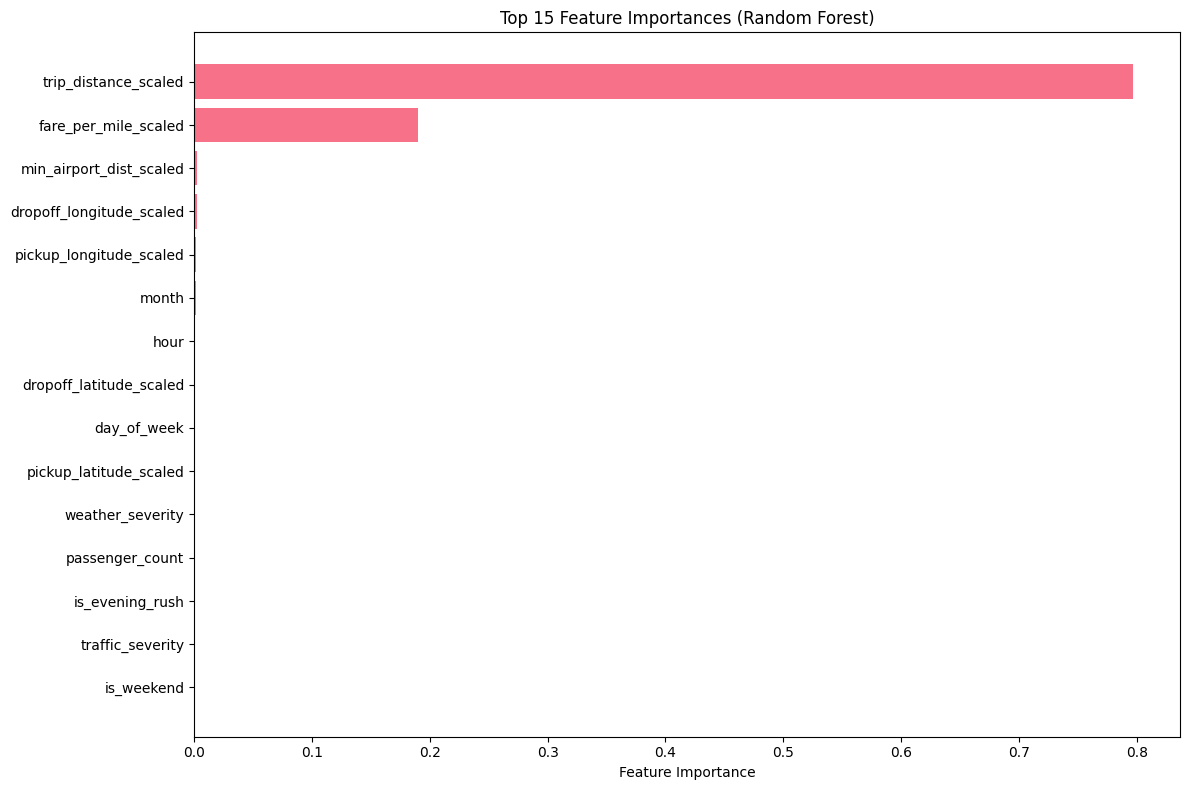


🎯 PREDICTION RANGE VALIDATION
Actual fare range: $0.00 - $495.00
RF predictions range: $2.63 - $81.06
LR predictions range: $2.73 - $67.77

🔒 DATA LEAKAGE VALIDATION
✅ Temporal split is correct - no data leakage detected

📊 PERFORMANCE BENCHMARKS

📊 Mean Baseline Performance Metrics:
  Mean Absolute Error (MAE): $6.51
  Root Mean Square Error (RMSE): $11.33
  R² Score: -0.0358
  Mean Absolute Percentage Error (MAPE): inf%

🏆 Performance Comparison (R² Score):
  Mean Baseline:     -0.0358
  Linear Regression: -0.0401
  Random Forest:     0.9438

✅ QUALITY ASSESSMENT
✅ Random Forest shows good predictive power (R² > 0.5)
⚠️ Random Forest shows high error rate (MAPE ≥ 30%)


In [11]:
print("=== 🧪 VALIDATION & QUALITY CHECKS ===")

# Function to calculate regression metrics
def calculate_metrics(y_true, y_pred, model_name="Model"):
    """Calculate and display regression metrics"""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    # Calculate percentage-based metrics
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print(f"\n📊 {model_name} Performance Metrics:")
    print(f"  Mean Absolute Error (MAE): ${mae:.2f}")
    print(f"  Root Mean Square Error (RMSE): ${rmse:.2f}")
    print(f"  R² Score: {r2:.4f}")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    
    return {'MAE': mae, 'RMSE': rmse, 'R2': r2, 'MAPE': mape}

# Quick baseline model validation
print("\n🤖 BASELINE MODEL VALIDATION")
print("Training a Random Forest to validate data quality...")

# Use a subset for quick validation (10,000 samples max)
sample_size = min(10000, len(X_train))
X_train_sample = X_train.sample(n=sample_size, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

print(f"🔄 Training Random Forest on {sample_size:,} samples...")

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
rf_model.fit(X_train_sample, y_train_sample)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
rf_metrics = calculate_metrics(y_test, y_pred_rf, "Random Forest Baseline")

# Linear regression comparison
print("\n📈 LINEAR REGRESSION COMPARISON")
lr_model = LinearRegression()
lr_model.fit(X_train_sample, y_train_sample)
y_pred_lr = lr_model.predict(X_test)
lr_metrics = calculate_metrics(y_test, y_pred_lr, "Linear Regression")

# Feature importance analysis
print("\n🎯 FEATURE IMPORTANCE ANALYSIS")
print("Top 10 most important features:")

feature_importance = pd.DataFrame({
    'feature': modeling_features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
    print(f"  {i:2d}. {row['feature']:30}: {row['importance']:.4f}")

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Prediction range validation
print("\n🎯 PREDICTION RANGE VALIDATION")
print(f"Actual fare range: ${y_test.min():.2f} - ${y_test.max():.2f}")
print(f"RF predictions range: ${y_pred_rf.min():.2f} - ${y_pred_rf.max():.2f}")
print(f"LR predictions range: ${y_pred_lr.min():.2f} - ${y_pred_lr.max():.2f}")

# Data leakage validation
print("\n🔒 DATA LEAKAGE VALIDATION")
train_max_date = train_df['pickup_datetime'].max()
test_min_date = test_df['pickup_datetime'].min()

if train_max_date <= test_min_date:
    print("✅ Temporal split is correct - no data leakage detected")
else:
    print("⚠️ WARNING: Potential temporal data leakage detected!")

# Performance benchmarks
print("\n📊 PERFORMANCE BENCHMARKS")
mean_baseline = np.full(len(y_test), y_train.mean())
mean_metrics = calculate_metrics(y_test, mean_baseline, "Mean Baseline")

print(f"\n🏆 Performance Comparison (R² Score):")
print(f"  Mean Baseline:     {mean_metrics['R2']:6.4f}")
print(f"  Linear Regression: {lr_metrics['R2']:6.4f}")
print(f"  Random Forest:     {rf_metrics['R2']:6.4f}")

# Quality assessment
print("\n✅ QUALITY ASSESSMENT")
if rf_metrics['R2'] > 0.5:
    print("✅ Random Forest shows good predictive power (R² > 0.5)")
else:
    print("⚠️ Random Forest shows weak predictive power (R² ≤ 0.5)")

if rf_metrics['MAPE'] < 30:
    print("✅ Random Forest shows acceptable error rate (MAPE < 30%)")
else:
    print("⚠️ Random Forest shows high error rate (MAPE ≥ 30%)")

## 12. Data Export & Summary

In [12]:
print("=== 💾 DATA EXPORT & SUMMARY ===")

# Create output directory if it doesn't exist
import os
output_dir = 'processed_data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"✅ Created output directory: {output_dir}")

# Save processed datasets
print(f"\n💾 Saving processed datasets...")

# Save complete processed dataset
df_clean.to_csv(f'{output_dir}/preprocessed_dataset.csv', index=False)
print(f"✅ Saved: preprocessed_dataset.csv ({len(df_clean):,} rows)")

# Save train/test splits
train_df.to_csv(f'{output_dir}/train_dataset.csv', index=False)
test_df.to_csv(f'{output_dir}/test_dataset.csv', index=False)
print(f"✅ Saved: train_dataset.csv ({len(train_df):,} rows)")
print(f"✅ Saved: test_dataset.csv ({len(test_df):,} rows)")

# Save feature matrices and target vectors
X_train.to_csv(f'{output_dir}/X_train.csv', index=False)
y_train.to_csv(f'{output_dir}/y_train.csv', index=False, header=['fare_amount'])
X_test.to_csv(f'{output_dir}/X_test.csv', index=False)
y_test.to_csv(f'{output_dir}/y_test.csv', index=False, header=['fare_amount'])
print(f"✅ Saved: X_train.csv, y_train.csv, X_test.csv, y_test.csv")

# Save feature information and metadata
feature_info = {
    'preprocessing_date': str(datetime.now()),
    'original_dataset_size': len(df),
    'cleaned_dataset_size': len(df_clean),
    'train_size': len(train_df),
    'test_size': len(test_df),
    'modeling_features': modeling_features,
    'essential_features': essential_features,
    'location_features': location_features,
    'enhanced_features': enhanced_features,
    'feature_importance': feature_importance.to_dict('records'),
    'validation_metrics': {
        'random_forest': rf_metrics,
        'linear_regression': lr_metrics,
        'mean_baseline': mean_metrics
    },
    'data_quality_checks': {
        'temporal_split_valid': train_max_date <= test_min_date,
        'missing_values_handled': True,
        'features_scaled': True,
        'logical_errors_filtered': True
    }
}

with open(f'{output_dir}/preprocessing_metadata.json', 'w') as f:
    json.dump(feature_info, f, indent=2, default=str)
print(f"✅ Saved: preprocessing_metadata.json")

# Final summary
print(f"\n=== 🎉 PREPROCESSING COMPLETE ===")
print(f"📊 Original data: {len(df):,} trips")
print(f"🧹 Cleaned data: {len(df_clean):,} trips ({len(df_clean)/len(df)*100:.1f}% retained)")
print(f"🚂 Training set: {len(train_df):,} trips")
print(f"🧪 Test set: {len(test_df):,} trips")
print(f"🎯 Features for modeling: {len(modeling_features)}")
print(f"📈 Best model R² score: {rf_metrics['R2']:.4f}")
print(f"💾 All files saved to: {output_dir}/")
print(f"\n🚀 Ready for ML model training!")

# Display final feature list
print(f"\n📋 Final modeling features ({len(modeling_features)}):")
for i, feature in enumerate(modeling_features, 1):
    importance = feature_importance[feature_importance['feature'] == feature]['importance'].iloc[0]
    print(f"{i:2d}. {feature:30} (importance: {importance:.4f})")

print(f"\n✨ Data preprocessing pipeline completed successfully!")
print(f"📅 Completed at: {datetime.now()}")

=== 💾 DATA EXPORT & SUMMARY ===
✅ Created output directory: processed_data

💾 Saving processed datasets...
✅ Saved: preprocessed_dataset.csv (483,825 rows)
✅ Saved: train_dataset.csv (387,060 rows)
✅ Saved: test_dataset.csv (96,765 rows)
✅ Saved: X_train.csv, y_train.csv, X_test.csv, y_test.csv
✅ Saved: preprocessing_metadata.json

=== 🎉 PREPROCESSING COMPLETE ===
📊 Original data: 500,000 trips
🧹 Cleaned data: 483,825 trips (96.8% retained)
🚂 Training set: 387,060 trips
🧪 Test set: 96,765 trips
🎯 Features for modeling: 19
📈 Best model R² score: 0.9438
💾 All files saved to: processed_data/

🚀 Ready for ML model training!

📋 Final modeling features (19):
 1. pickup_latitude_scaled         (importance: 0.0008)
 2. pickup_longitude_scaled        (importance: 0.0013)
 3. dropoff_latitude_scaled        (importance: 0.0011)
 4. dropoff_longitude_scaled       (importance: 0.0024)
 5. passenger_count                (importance: 0.0003)
 6. hour                           (importance: 0.0011)
 7.